<a href="https://colab.research.google.com/github/rishuatgithub/MLPy/blob/master/WordEmbeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import layers

In [0]:
embedding_layers = layers.Embedding(1000,10)

In [4]:
result = embedding_layers(tf.constant([1,2,3]))
result.numpy()

array([[ 0.02892378,  0.04330511, -0.04350858,  0.04606298,  0.01532653,
         0.02025798, -0.047623  ,  0.04310621,  0.02846254,  0.03304989],
       [ 0.01646915, -0.03180424,  0.0108024 , -0.00047391, -0.02628168,
         0.03238914, -0.0288126 , -0.02390913, -0.02938774,  0.00302536],
       [-0.04173302,  0.04779318, -0.03447205, -0.03592096,  0.03750126,
        -0.01336731,  0.02928908,  0.00765145, -0.01379656,  0.01450104]],
      dtype=float32)

In [5]:
result = embedding_layers(tf.constant([[0,1,2],[3,4,5]]))
result.shape

TensorShape([2, 3, 10])

In [6]:
result

<tf.Tensor: shape=(2, 3, 10), dtype=float32, numpy=
array([[[ 0.01391086,  0.03090285,  0.01842237, -0.04916019,
          0.00741534, -0.04004639,  0.01717499, -0.02937767,
          0.04033489, -0.0262943 ],
        [ 0.02892378,  0.04330511, -0.04350858,  0.04606298,
          0.01532653,  0.02025798, -0.047623  ,  0.04310621,
          0.02846254,  0.03304989],
        [ 0.01646915, -0.03180424,  0.0108024 , -0.00047391,
         -0.02628168,  0.03238914, -0.0288126 , -0.02390913,
         -0.02938774,  0.00302536]],

       [[-0.04173302,  0.04779318, -0.03447205, -0.03592096,
          0.03750126, -0.01336731,  0.02928908,  0.00765145,
         -0.01379656,  0.01450104],
        [-0.00446839,  0.00341006, -0.02935089, -0.03999417,
          0.04957801, -0.02007909,  0.01906768,  0.02551215,
          0.01192757, -0.01508253],
        [-0.04063549, -0.04485748, -0.00757761,  0.04632534,
         -0.01256894, -0.03113345, -0.03326361,  0.03889633,
         -0.02043489, -0.01043113]

From Scratch

In [7]:
(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k', 
    split = (tfds.Split.TRAIN, tfds.Split.TEST), 
    with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0UKH3W/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0UKH3W/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete0UKH3W/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [11]:
### Looking at the vocabulary

encoder = info.features['text'].encoder
encoder.subwords[:20]

['the_',
 ', ',
 '. ',
 'a_',
 'and_',
 'of_',
 'to_',
 's_',
 'is_',
 'br',
 'in_',
 'I_',
 'that_',
 'this_',
 'it_',
 ' /><',
 ' />',
 'was_',
 'The_',
 'as_']

In [0]:
train_batches = train_data.shuffle(1000).padded_batch(10)
test_batches = test_data.shuffle(1000).padded_batch(10)

In [13]:
train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[  12,   31,   33, ...,    0,    0,    0],
       [7963, 6389,  884, ...,   14,  204, 7975],
       [  12, 5123,   14, ...,    0,    0,    0],
       ...,
       [  19, 4881,  643, ...,    0,    0,    0],
       [  62,   27,    9, ...,    0,    0,    0],
       [  19,  118,  874, ...,    0,    0,    0]])

In [16]:
embedding_dim=16

model = keras.Sequential([
  layers.Embedding(encoder.vocab_size, embedding_dim),
  layers.GlobalAveragePooling1D(),
  layers.Dense(16, activation='relu'),
  layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 131,249
Trainable params: 131,249
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(
    train_batches,
    epochs=10,
    validation_data=test_batches, validation_steps=20)

Epoch 1/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.4954 - accuracy: 0.7074 - val_loss: 0.3097 - val_accuracy: 0.9100
Epoch 2/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.2781 - accuracy: 0.8844 - val_loss: 0.4006 - val_accuracy: 0.8550
Epoch 3/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.2243 - accuracy: 0.9122 - val_loss: 0.2750 - val_accuracy: 0.8900
Epoch 4/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1942 - accuracy: 0.9267 - val_loss: 0.2232 - val_accuracy: 0.9100
Epoch 5/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1705 - accuracy: 0.9362 - val_loss: 0.3415 - val_accuracy: 0.8550
Epoch 6/10
2500/2500 [==============================] - 13s 5ms/step - loss: 0.1534 - accuracy: 0.9452 - val_loss: 0.3112 - val_accuracy: 0.9150
Epoch 7/10
2500/2500 [==============================] - 14s 5ms/step - loss: 0.1367 - accuracy: 0.9500 - val_loss: 0.3663 - val_ac

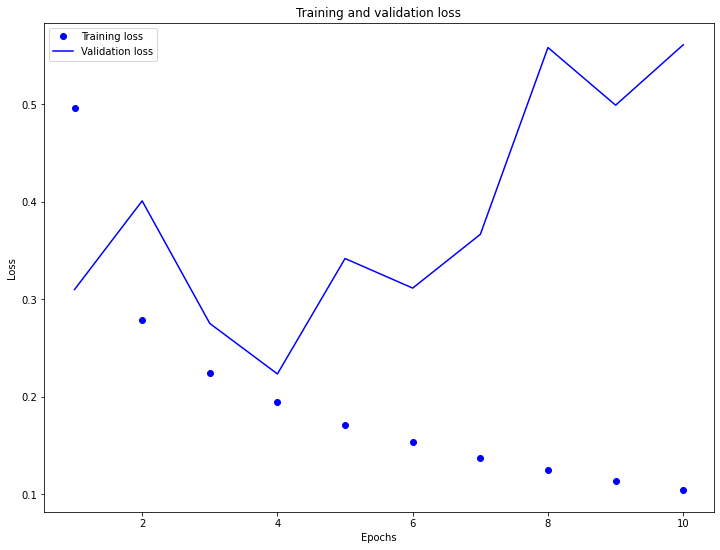

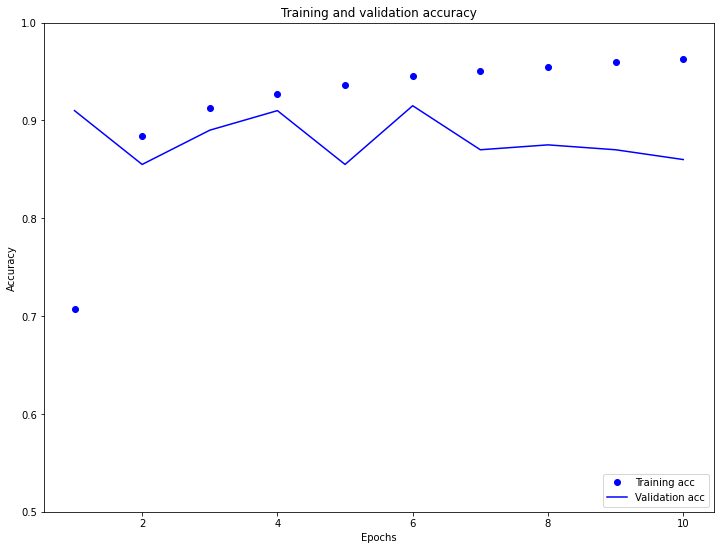

In [18]:
import matplotlib.pyplot as plt

history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss=history_dict['loss']
val_loss=history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,9))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5,1))
plt.show()